# Clustering California Housing with K-means
**Md Fazlay Rabbi Masum Billah (masum@virginia.edu)**

In this project, we attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. 

---
##  PRE-PROCESSING THE DATA


In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

np.random.seed(42)

def load_result_data(file_path = './'):
    csv_path = os.path.join(file_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_result_data()

encoder = LabelEncoder()
housing["ocean_proximity"] = encoder.fit_transform(housing["ocean_proximity"])

imputer = Imputer(strategy="median")
imputer.fit(housing)
X = imputer.transform(housing)
housing = pd.DataFrame(X, columns=housing.columns, index = list(housing.index.values))

scaler = StandardScaler()
scaler.fit(housing)

housing = scaler.transform(housing)

long = housing[:,0]
lat = housing[:,1]

- - -
## IMPLEMENTING K-MEANS

In [220]:
import random
import math
#from scipy.stats import spearmanr

MAX_ITERATIONS = 5

def kmeans(dataSet, k):
    
    centroids = getInitialCentroids(dataSet, k)
    
    iterations = 0
    prevStepCentroids = None
    
    while stopIteration(prevStepCentroids, centroids, iterations) == False:

        prevStepCentroids = centroids
        iterations += 1
        
        labels = getEuclideanLabels(dataSet, centroids) 
        #labels = getSpearmanLabels(dataSet, centroids) 
        
        centroids = getCentroids(dataSet, labels, k)

    return centroids

def getInitialCentroids(dataSet, k):
    randomCentroids = np.zeros(shape=(k,len(dataSet[0])))
    
    for x in range(k):
        rand_idx = random.randint(0,len(dataSet))
        randomCentroids[x] = dataSet[rand_idx,:]

    return randomCentroids

def stopIteration(oldCentroids, centroids, iterations):
    if iterations > MAX_ITERATIONS: return True
    elif np.array_equal(oldCentroids,centroids): return True
    else: return False

def getEuclideanLabels(dataSet, centroids):
    labels = []

    distances = np.sqrt(((dataSet - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def getSpearmanLabels(dataSet, centroids):
    
    x = dataSet
    y = centroids[:, np.newaxis]
    
    x_bar = np.mean(dataSet)
    y_bar = np.mean(centroids[:, np.newaxis])
    
    numerator = ((x - x_bar) * (y - y_bar)).sum(axis=2)
    denom = (((x - x_bar)**2).sum()) * (((y - y_bar)**2).sum())
    
    dist = numerator / np.sqrt(denom)
    return np.argmin(dist, axis=0)

def getCentroids(dataSet, labels, j): 
    retVal = np.array([dataSet[labels==k].mean(axis=0) for k in range(j)])
    return retVal


- - -
## CLUSTERING HOUSING INTO REGIONS

C:\Users\Masum\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


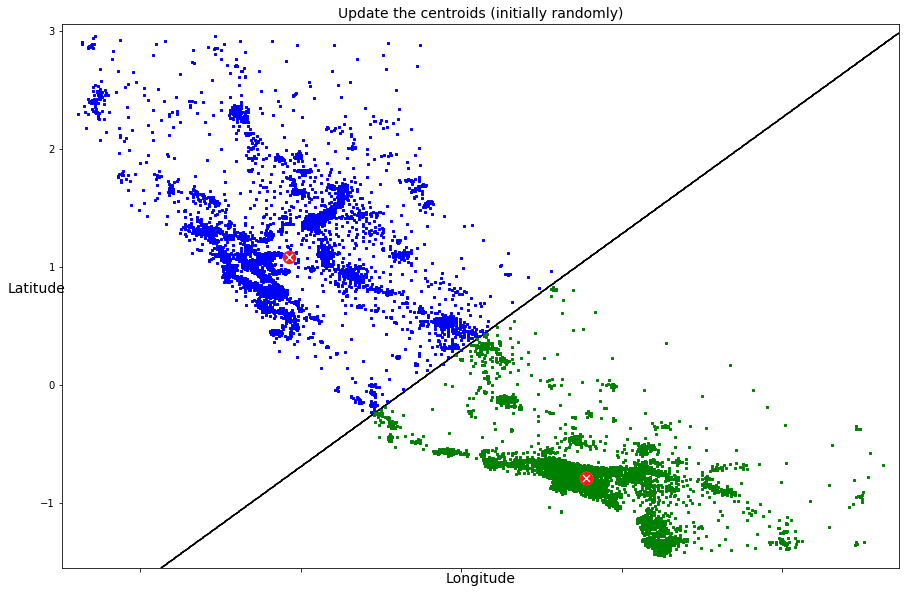

In [221]:
from matplotlib.pyplot import cm

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_data(X, color):
    plt.plot(X[:, 0], X[:, 1], color, markersize=2)

def plot_decision_boundaries(centroids, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = getEuclideanLabels(np.c_[xx.ravel(), yy.ravel()], centroids)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),colors="w")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    #plot_data(X,color)
    if show_centroids:
        plot_centroids(centroids)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    
dataSet = housing[:,0:2]
k = 2

centroids = kmeans(dataSet,k)
labels = getEuclideanLabels(dataSet, centroids)
color=["bs", "gs", "ys", "ms", "ks","cs","b^"]    
    
plt.figure(figsize=(15, 10))
plot_decision_boundaries(centroids, dataSet)
clusters= {label: dataSet[labels==label] for label in np.unique(labels)}


for i in range(len(clusters)):
    plot_data(clusters[i], color[i])

plot_centroids(centroids, circle_color='r', cross_color='w')

plt.xlabel("Longitude", fontsize=14, rotation=0)
plt.ylabel("Latitude", fontsize=14, rotation=0)

plt.tick_params(labelbottom='off')
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.show()

In [222]:
SSE =0.0
standard_dev = [0]*k
val_count = [0]*k

for c in range(k):
    for i in range(len(dataSet)):
        if labels[i] == c:
            SSE =SSE+ np.linalg.norm(centroids[c]-dataSet[i])**2
            standard_dev[c] = standard_dev[c] + np.linalg.norm(centroids[c]-dataSet[i])**2
            val_count[c] = val_count[c] +1


print("Sum squared error (SSE): "+str(SSE))
for i in range(k):
    print("Standard Deviation of Cluster-"+str(i+1)+": "+ str(np.sqrt(standard_dev[i]/val_count[i])))

    
print("Cluster means:\n"+str(centroids))
            

Sum squared error (SSE): 6240.80944187639
Standard Deviation of Cluster-1: 0.6337666583402607
Standard Deviation of Cluster-2: 0.4798818599384742
Cluster means:
[[-1.07409837  1.08835684]
 [ 0.77983961 -0.79019185]]



**Changing the number of clusters:**


C:\Users\Masum\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


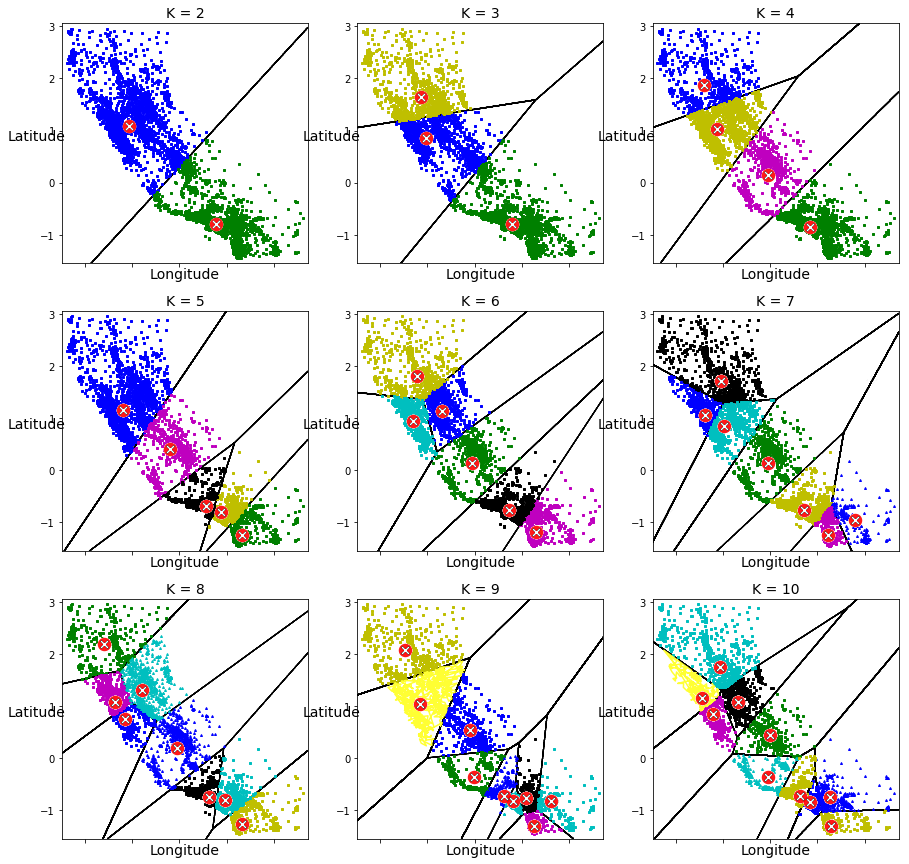

In [223]:

plt.figure(figsize=(15, 15))

i =0
for k in range(2,11):

    plt.subplot(331+i)
    i = i+1
    
    centroids = kmeans(dataSet,k)
    labels = getEuclideanLabels(dataSet, centroids)

    clusters= {label: dataSet[labels==label] for label in np.unique(labels)}

    color=["bs", "gs", "ys", "ms", "ks","cs",'b^',"c^",'#FFFF33',"ys"]
    for i in range(len(clusters)):
        plot_data(clusters[i], color[i])
        plot_decision_boundaries(centroids, dataSet)
    plot_centroids(centroids, circle_color='r', cross_color='w')

    plt.xlabel("Longitude", fontsize=14, rotation=0)
    plt.ylabel("Latitude", fontsize=14, rotation=0)

    plt.tick_params(labelbottom='off')
    plt.title("K = "+str(k), fontsize=14)

plt.show()

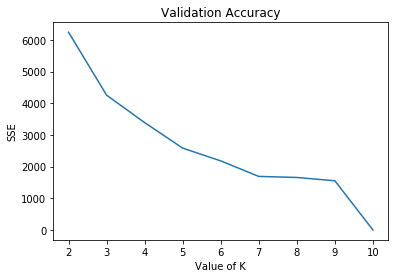

In [224]:
SSE =[0.0]*9

for k in range(2,10):
    
    centroids = kmeans(dataSet,k)
    labels = getEuclideanLabels(dataSet, centroids)
    
    for c in range(k):
        for i in range(len(dataSet)):
            if labels[i] == c:
                SSE[k-2] =SSE[k-2]+ np.linalg.norm(centroids[c]-dataSet[i])**2

df=pd.DataFrame({'xvalues': range(2,11), 'yvalues': SSE })
plt.xlabel('Value of K')  
plt.ylabel('SSE')  
plt.title('Validation Accuracy')

plt.plot( 'xvalues', 'yvalues', data=df)
plt.show()


K=10 has the lowest error. However, as k increases smoothness of decision boundaries does not seem to change. It maybe due to the fact that data set is tangled in a way that its hard to determine clusters that could be smoothly separable.

Spearson Correlation works better than Eucledean in this dataset since Spearson correlation evaluates the monotonic relationship between the data points.
In the urban and coastal areas of California fewer housing units have been built in comparision with the demand created by economic growth in those areas. Which resulted in higher prices for housing costal and urban areas, gradually which spilledover to the inland areas. We can see from the clusters that some major cities including San Fransisco, San Diego and San Jose have the highest housing prices. Which is mainly because of the technological boom and rapid growth of industries in those areas creating many employment opportunities. 
There could be some possible solution to handle this problem. Governemnt can take initiative to increase the number of houses while focusing on decentralizing the economicial hubs. Changing tax structure, establishing density bonuses, making tax vacant lands etc could also be some possible solutions.